In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pathlib import Path

import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pathlib import Path

DATA_DIR=Path("..")/"data"
MODEL_DIR=Path("..")/"models"
OUT_DIR=Path("..")/"data/processed"

OUT_DIR.mkdir(parents=True, exist_ok=True)
MODEL_DIR.mkdir(parents=True,exist_ok=True)

column_names=['unit','cycle'] + [f"op{i}" for i in range(1,4)] + [f"s{i}" for i in range(1,22)]
test=pd.read_csv(DATA_DIR/"beforeProcessing/test_FD004.txt",sep=r"\s+",header=None,names=column_names,index_col=False)
rul_test=pd.read_csv(DATA_DIR/"beforeProcessing/RUL_FD004.txt",sep=r"\s+",header=None,index_col=False,names=["RUL"])

In [5]:
drop_cols=['s1','s2','s5','s6','s7','s8','s10','s16','s17','s21','s18','s19']
keep_cols=['s3', 's4', 's9', 's11', 's12','s13', 's14', 's15', 's20']
test=test.drop(columns=drop_cols)
test.head()

,unit,cycle,op1,op2,op3,s3,s4,s9,s11,s12,s13,s14,s15,s20
0,1,1,20.0072,0.7000,100.0,1481.04,1227.81,8704.98,43.83,313.03,2387.78,8048.98,9.2229,24.31
1,1,2,24.9984,0.6200,60.0,1256.17,1031.48,7999.94,36.11,163.61,2028.09,7863.46,10.8632,14.36
2,1,3,42.0000,0.8420,100.0,1340.13,1105.88,8305.38,41.52,129.98,2387.95,8071.13,9.3960,10.39
3,1,4,42.0035,0.8402,100.0,1339.70,1107.26,8301.00,41.73,129.48,2387.90,8078.89,9.3594,10.56
4,1,5,35.0079,0.8400,100.0,1353.04,1117.80,8331.05,41.32,181.82,2387.87,8057.83,9.3030,14.85


In [6]:
rul_test.head()

,RUL
0,22
1,39
2,107
3,75
4,149


In [7]:
train=pd.read_csv(DATA_DIR/"beforeProcessing/train_FD004_with_RULF.csv", index_col=False)
train['RUL_Value']=train['RUL_Value'].clip(upper=125)
train.head()

train.groupby('unit')['RUL_Value'].mean().max()

np.float64(110.49723756906077)

In [8]:
train.sample(50)

,unit,cycle,op1,op2,op3,s3,s4,s9,s11,s12,s13,s14,s15,s20,RUL_Value
1487,6,94,25.0062,0.6200,60.0,1251.27,1045.66,8002.69,36.44,164.25,2028.23,7872.35,10.8960,14.09,125
11773,48,57,10.0043,0.2508,100.0,1495.40,1290.70,8763.41,44.87,369.55,2387.84,8118.64,8.6440,28.53,125
35127,144,138,25.0071,0.6206,60.0,1262.85,1045.73,8011.80,36.62,165.49,2028.33,7874.28,10.8067,14.44,125
51574,208,240,19.9985,0.7000,100.0,1485.67,1249.08,8779.24,44.45,314.85,2388.43,8106.93,9.2451,24.51,50
9041,37,156,35.0069,0.8404,100.0,1357.91,1114.07,8338.75,41.54,182.53,2387.94,8068.54,9.2806,14.78,125
56378,229,124,41.9985,0.8400,100.0,1351.57,1119.08,8324.45,42.06,130.67,2388.05,8081.36,9.3506,10.65,125
5470,21,168,20.0012,0.7008,100.0,1482.03,1255.62,8743.42,44.48,318.58,2388.28,8078.86,9.0768,24.69,59
12625,50,141,42.0026,0.8404,100.0,1345.01,1132.03,8343.24,42.21,132.05,2388.22,8110.10,9.2350,10.79,31
31889,131,158,42.0009,0.8408,100.0,1352.54,1115.39,8319.59,41.88,130.87,2388.11,8086.37,9.2946,10.75,125
39186,160,129,42.0054,0.8401,100.0,1358.00,1126.70,8331.12,42.00,130.74,2387.97,8084.15,9.4027,10.66,58


In [9]:
train.head()

,unit,cycle,op1,op2,op3,s3,s4,s9,s11,s12,s13,s14,s15,s20,RUL_Value
0,1,1,42.0049,0.8400,100.0,1343.43,1112.93,8311.32,41.69,129.78,2387.99,8074.83,9.3335,10.62,125
1,1,2,20.0020,0.7002,100.0,1477.61,1237.50,8713.60,43.94,312.59,2387.73,8046.13,9.1913,24.37,125
2,1,3,42.0038,0.8409,100.0,1343.12,1117.05,8306.69,41.66,129.62,2387.97,8066.62,9.4007,10.48,125
3,1,4,42.0000,0.8400,100.0,1341.24,1118.03,8312.35,41.68,129.80,2388.02,8076.05,9.3369,10.54,125
4,1,5,25.0063,0.6207,60.0,1255.23,1033.59,7994.94,36.48,164.11,2028.08,7865.80,10.8366,14.03,125


In [10]:
# cluster number find
OPR_col=['op3','op2','op1']
wcss=[]

for i in range (1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(train[OPR_col])
    wcss.append(kmeans.inertia_)

wcss

[25827329.787444163,
 13375909.62148553,
 2116834.372980841,
 740216.7596445286,
 281440.2465010123,
 0.46839830090983736,
 0.4124127291795324,
 0.3169878470575613,
 0.25951520984760484]

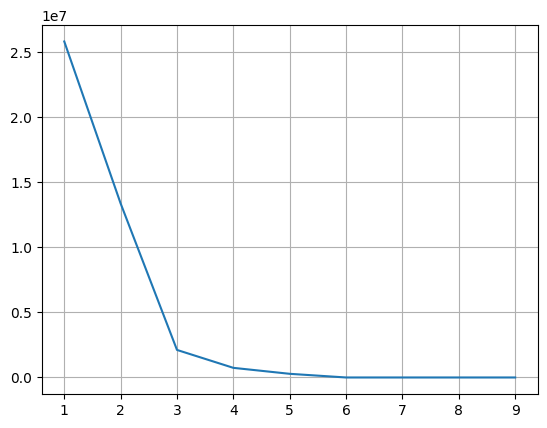

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss)
plt.grid()
plt.show()

In [12]:
OPR_col=['op3','op2','op1']
totalCluster=6

kmeans=KMeans(n_clusters=totalCluster,random_state=42)
train['clusterId']=kmeans.fit_predict(train[OPR_col])
test['clusterId']=kmeans.predict(test[OPR_col])

joblib.dump(kmeans,MODEL_DIR/"kmeans_operSettings.pkl")

train['clusterId'].value_counts()

clusterId
0    15395
4     9238
1     9224
5     9162
2     9139
3     9091
Name: count, dtype: int64

In [13]:
cols=['unit', 'cycle', 'op1', 'op2', 'op3','clusterId', 's3', 's4', 's9', 's11', 's12',
       's13', 's14', 's15', 's20', 'RUL_Value']
train=train[cols]
train.head()

,unit,cycle,op1,op2,op3,clusterId,s3,s4,s9,s11,s12,s13,s14,s15,s20,RUL_Value
0,1,1,42.0049,0.8400,100.0,0,1343.43,1112.93,8311.32,41.69,129.78,2387.99,8074.83,9.3335,10.62,125
1,1,2,20.0020,0.7002,100.0,3,1477.61,1237.50,8713.60,43.94,312.59,2387.73,8046.13,9.1913,24.37,125
2,1,3,42.0038,0.8409,100.0,0,1343.12,1117.05,8306.69,41.66,129.62,2387.97,8066.62,9.4007,10.48,125
3,1,4,42.0000,0.8400,100.0,0,1341.24,1118.03,8312.35,41.68,129.80,2388.02,8076.05,9.3369,10.54,125
4,1,5,25.0063,0.6207,60.0,2,1255.23,1033.59,7994.94,36.48,164.11,2028.08,7865.80,10.8366,14.03,125


In [14]:
scalers={}

for cid in sorted(train.clusterId.unique()):
    idx=train['clusterId']==cid
    scaler=StandardScaler()
    train.loc[idx,keep_cols]=scaler.fit_transform(train.loc[idx,keep_cols])
    scalers[cid]=scaler

for cid, scaler in scalers.items():
    idx=test.clusterId==cid
    test.loc[idx,keep_cols]=scaler.transform(test.loc[idx,keep_cols])

joblib.dump(scalers, MODEL_DIR/"Scalled Sensors by clusters.pkl")

['..\\models\\Scalled Sensors by clusters.pkl']

In [15]:
scalers.values()

dict_values([StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler()])

In [16]:
WINDOW = 10

def add_rolling_features(df,windowSize,sensors):
    out=[]
    for uid,g in df.groupby('unit'):
        g=g.sort_values('cycle').copy()
        for s in sensors:
            g[f'{s}_rmean']=g[s].rolling(window=windowSize,min_periods=1).mean()
            g[f'{s}_rstd']=g[s].rolling(window=windowSize,min_periods=1).std().fillna(0)
        out.append(g)
    return pd.concat(out,ignore_index=True)

train=add_rolling_features(train,WINDOW,keep_cols)
test=add_rolling_features(test,WINDOW,keep_cols)

test.head()


,unit,cycle,op1,op2,op3,s3,s4,s9,s11,s12,...,s12_rmean,s12_rstd,s13_rmean,s13_rstd,s14_rmean,s14_rstd,s15_rmean,s15_rstd,s20_rmean,s20_rstd
0,1,1,20.0072,0.7000,100.0,-0.371035,-2.446822,-1.362232,-1.804439,-1.255108,...,-1.255108,0.000000,-1.670254,0.000000,-1.185652,0.000000,0.498634,0.000000,-1.285619,0.000000
1,1,2,24.9984,0.6200,60.0,-0.773963,-2.045458,-1.064475,-2.395428,-1.322474,...,-1.288791,0.047635,-1.328571,0.483213,-1.209962,0.034380,0.240286,0.365358,-0.448137,1.184379
2,1,3,42.0000,0.8420,100.0,-1.884844,-2.063497,-1.197224,-1.797836,-0.883522,...,-1.153701,0.236394,-1.066077,0.568732,-1.195202,0.035279,0.456366,0.454769,-0.952984,1.210780
3,1,4,42.0035,0.8402,100.0,-1.950033,-1.910489,-1.433602,-1.068035,-1.406676,...,-1.216945,0.230768,-0.983296,0.492999,-1.072313,0.247460,0.437617,0.373206,-0.847174,1.010993
4,1,5,35.0079,0.8400,100.0,-1.810317,-1.206594,-1.397256,-2.013464,-1.272462,...,-1.228048,0.201387,-0.981765,0.426964,-1.056707,0.217129,0.392121,0.338838,-0.725962,0.916538


In [17]:
train[['s12','s12_rmean']]

,s12,s12_rmean
0,-1.092784,-1.092784
1,-1.475777,-1.284280
2,-1.260193,-1.276251
3,-1.071858,-1.225153
4,-0.800771,-1.140276
...,...,...
61244,3.443779,2.942546
61245,3.655427,3.015055
61246,3.774347,3.129495
61247,3.507597,3.234835


In [18]:
def add_lag_delta(df,sensors):
    out=[]
    for uid,g in df.groupby('unit'):
        g=g.sort_values('cycle').copy()
        for s in sensors:
            g[f"{s}_lag1"]=g[s].shift(1).fillna(method='bfill')
            g[f"{s}_delta"]=g[s]-g[f"{s}_lag1"]
        out.append(g)
    return pd.concat(out,ignore_index=True)

train=add_lag_delta(train,keep_cols)
test=add_lag_delta(test,keep_cols)

In [19]:
test[['s12','s12_lag1','s12_delta']]

,s12,s12_lag1,s12_delta
0,-1.255108,-1.255108,0.000000
1,-1.322474,-1.255108,-0.067366
2,-0.883522,-1.322474,0.438951
3,-1.406676,-0.883522,-0.523154
4,-1.272462,-1.406676,0.134214
...,...,...,...
41209,0.047691,-0.465337,0.513028
41210,-0.512856,0.047691,-0.560547
41211,-0.535863,-0.512856,-0.023007
41212,-0.683373,-0.535863,-0.147511


In [20]:
FEATURES = (
    ['cycle', 'clusterId'] +
    OPR_col +
    keep_cols +
    [f'{s}_rmean' for s in keep_cols] +
    [f'{s}_rstd'  for s in keep_cols] +
    [f'{s}_lag1'  for s in keep_cols] +
    [f'{s}_delta' for s in keep_cols]
)

joblib.dump(FEATURES, MODEL_DIR / "feature_list.pkl")

len(FEATURES)

50

In [21]:
train_final = train[['unit'] + FEATURES + ['RUL_Value']]
test_final  = test[['unit'] + FEATURES]

train_final.isna().sum().sum(), test_final.isna().sum().sum()


(np.int64(0), np.int64(0))

In [22]:
train_final.head(15)

,unit,cycle,clusterId,op3,op2,op1,s3,s4,s9,s11,...,s3_delta,s4_delta,s9_delta,s11_delta,s12_delta,s13_delta,s14_delta,s15_delta,s20_delta,RUL_Value
0,1,1,0,100.0,0.8400,42.0049,-1.384552,-1.281826,-0.876658,-1.207045,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125
1,1,2,3,100.0,0.7002,20.0020,-0.887981,-1.357166,-0.878516,-1.415964,...,0.496571,-0.075340,-0.001858,-0.208919,-0.382993,-1.521290,-0.428071,-0.010412,-0.916954,125
2,1,3,0,100.0,0.8409,42.0038,-1.431549,-0.825019,-1.126527,-1.311302,...,-0.543568,0.532147,-0.248011,0.104661,0.215584,1.443745,-0.060758,0.941581,-0.263109,125
3,1,4,0,100.0,0.8400,42.0000,-1.716564,-0.716361,-0.821071,-1.241797,...,-0.285015,0.108658,0.305456,0.069505,0.188335,0.193864,0.561469,-0.884057,0.505741,125
4,1,5,2,60.0,0.6207,25.0063,-0.935535,-1.763233,-1.440636,-0.861316,...,0.781028,-1.046871,-0.619564,0.380481,0.271087,-0.761990,-0.162321,-0.452776,-1.487590,125
5,1,6,5,100.0,0.8400,34.9996,-1.836689,-1.297912,-0.894266,-1.579309,...,-0.901153,0.465320,0.546370,-0.717993,-0.409002,0.056030,-0.193413,1.048041,2.390450,125
6,1,7,4,100.0,0.0001,0.0019,-0.752842,-1.167301,-0.674223,-1.691476,...,1.083847,0.130612,0.220042,-0.112167,0.431649,-0.329463,0.261831,-0.737132,-0.388361,125
7,1,8,0,100.0,0.8400,41.9981,-1.273881,-1.521316,-1.094686,-1.519817,...,-0.521040,-0.354016,-0.420463,0.171660,-0.450680,0.841559,0.090331,0.571425,-0.430209,125
8,1,9,0,100.0,0.8400,42.0016,-1.472482,-2.530282,-1.066084,-2.075855,...,-0.198601,-1.008965,0.028603,-0.556038,0.000000,0.116319,-0.289368,-0.408772,0.674321,125
9,1,10,2,60.0,0.6217,25.0019,-1.506197,-0.722610,-0.621357,-1.856416,...,-0.033715,1.807672,0.444726,0.219440,0.396731,-0.460536,0.437947,0.590230,0.172982,125


In [23]:
test_final.head(15)

,unit,cycle,clusterId,op3,op2,op1,s3,s4,s9,s11,...,s20_lag1,s3_delta,s4_delta,s9_delta,s11_delta,s12_delta,s13_delta,s14_delta,s15_delta,s20_delta
0,1,1,3,100.0,0.7000,20.0072,-0.371035,-2.446822,-1.362232,-1.804439,...,-1.285619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,2,60.0,0.6200,24.9984,-0.773963,-2.045458,-1.064475,-2.395428,...,-1.285619,-0.402928,0.401363,0.297757,-0.590989,-0.067366,0.683366,-0.048621,-0.516695,1.674965
2,1,3,0,100.0,0.8420,42.0000,-1.884844,-2.063497,-1.197224,-1.797836,...,0.389345,-1.110881,-0.018038,-0.132750,0.597592,0.438951,0.445798,0.068591,0.906586,-2.352022
3,1,4,0,100.0,0.8402,42.0035,-1.950033,-1.910489,-1.433602,-1.068035,...,-1.962677,-0.065190,0.153008,-0.236377,0.729800,-0.523154,-0.193864,0.462036,-0.507155,1.432933
4,1,5,5,100.0,0.8400,35.0079,-1.810317,-1.206594,-1.397256,-2.013464,...,-0.529744,0.139716,0.703894,0.036345,-0.945428,0.134214,-0.240686,-0.290636,-0.171231,0.288630
5,1,6,2,60.0,0.6203,25.0010,-0.909753,-0.405607,-0.974196,-1.151553,...,-0.241114,0.900564,0.800987,0.423060,0.861910,0.304746,0.123097,0.093729,-0.188394,-0.852265
6,1,7,3,100.0,0.7015,19.9996,-1.578248,-2.130833,-1.148432,-1.415964,...,-1.093380,-0.668495,-1.725225,-0.174236,-0.264410,-0.417787,-0.580677,-0.022178,0.008802,1.014079
7,1,8,5,100.0,0.8414,35.0015,-0.564631,-1.514070,-1.514153,-1.760207,...,-0.079300,1.013617,0.616762,-0.365721,-0.344243,0.434324,0.348508,-0.198380,0.142178,-0.236089
8,1,9,3,100.0,0.7000,19.9980,-0.242929,-1.059169,-1.325196,-1.945703,...,-0.315389,0.321703,0.454901,0.188957,-0.185496,-0.720191,-0.680356,0.164774,-0.080588,-0.797899
9,1,10,0,100.0,0.8416,42.0033,-1.564960,-2.014711,-1.429824,-1.346055,...,-1.113288,-1.322032,-0.955542,-0.104628,0.599648,0.484419,1.301524,0.074069,0.657821,-0.343648


In [28]:
train_final.to_csv(OUT_DIR/"train_features_FD004.csv",index=False)
test_final.to_csv(OUT_DIR/"test_features_FD004.csv",index=False)

In [25]:
print(train_final.shape)
print(test_final.shape)

(61249, 52)
(41214, 51)


In [27]:
display(train_final.head())
display(test_final.head())


,unit,cycle,clusterId,op3,op2,op1,s3,s4,s9,s11,...,s3_delta,s4_delta,s9_delta,s11_delta,s12_delta,s13_delta,s14_delta,s15_delta,s20_delta,RUL_Value
0,1,1,0,100.0,0.8400,42.0049,-1.384552,-1.281826,-0.876658,-1.207045,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125
1,1,2,3,100.0,0.7002,20.0020,-0.887981,-1.357166,-0.878516,-1.415964,...,0.496571,-0.075340,-0.001858,-0.208919,-0.382993,-1.521290,-0.428071,-0.010412,-0.916954,125
2,1,3,0,100.0,0.8409,42.0038,-1.431549,-0.825019,-1.126527,-1.311302,...,-0.543568,0.532147,-0.248011,0.104661,0.215584,1.443745,-0.060758,0.941581,-0.263109,125
3,1,4,0,100.0,0.8400,42.0000,-1.716564,-0.716361,-0.821071,-1.241797,...,-0.285015,0.108658,0.305456,0.069505,0.188335,0.193864,0.561469,-0.884057,0.505741,125
4,1,5,2,60.0,0.6207,25.0063,-0.935535,-1.763233,-1.440636,-0.861316,...,0.781028,-1.046871,-0.619564,0.380481,0.271087,-0.761990,-0.162321,-0.452776,-1.487590,125


,unit,cycle,clusterId,op3,op2,op1,s3,s4,s9,s11,...,s20_lag1,s3_delta,s4_delta,s9_delta,s11_delta,s12_delta,s13_delta,s14_delta,s15_delta,s20_delta
0,1,1,3,100.0,0.7000,20.0072,-0.371035,-2.446822,-1.362232,-1.804439,...,-1.285619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,2,60.0,0.6200,24.9984,-0.773963,-2.045458,-1.064475,-2.395428,...,-1.285619,-0.402928,0.401363,0.297757,-0.590989,-0.067366,0.683366,-0.048621,-0.516695,1.674965
2,1,3,0,100.0,0.8420,42.0000,-1.884844,-2.063497,-1.197224,-1.797836,...,0.389345,-1.110881,-0.018038,-0.132750,0.597592,0.438951,0.445798,0.068591,0.906586,-2.352022
3,1,4,0,100.0,0.8402,42.0035,-1.950033,-1.910489,-1.433602,-1.068035,...,-1.962677,-0.065190,0.153008,-0.236377,0.729800,-0.523154,-0.193864,0.462036,-0.507155,1.432933
4,1,5,5,100.0,0.8400,35.0079,-1.810317,-1.206594,-1.397256,-2.013464,...,-0.529744,0.139716,0.703894,0.036345,-0.945428,0.134214,-0.240686,-0.290636,-0.171231,0.288630
